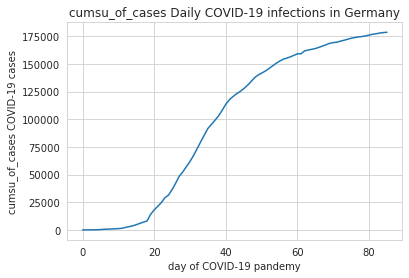

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import corona_data
import numpy as np


# Here we are importing data for our work/calculations.
sns.set_style("whitegrid")
data = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv/',
                   engine="python")
pd.set_option('display.max_rows', 10)
data

corona = corona_data.CoronaData()
countries = corona.countries
countries = sorted((set(data['countriesAndTerritories'])))
country = 'Germany'
day, cases, deaths = corona[country]


# Here I am plotting the total accumulated number of COVID-19 cases against the day for Germany.
cumsu_of_cases = np.cumsum(cases)
plt.plot(day, cumsu_of_cases )
plt.xlabel('day of COVID-19 pandemy')
plt.ylabel('cumsu_of_cases COVID-19 cases')
plt.title('cumsu_of_cases Daily COVID-19 infections in Germany')
plt.show()

# Discussion

Here we have plotted the total accumulated number of COVID-19 cases against days and we can 
see that initially it is increasing very rapidly from around day 18 onwards. Then from day 40 to 
60 and onwards increment of the curve is decreasing gradually.

The graph of total accumulated number of cases against days for freely spreading pandemy
first increases very rapidly (exponentially), then after reaching its maximum value it becomes
flat. It is because when all of the population is infected then no more people are left to get infected.

We can clearly see in our graph that initially it did not increase like freely spreading pendamy and also, 
it is still showing increasing trend because there is still a lot of uneffected population in Germany.
These differences are because of those drastic limitations on our life (closure of schools etc.) took effect 
in Germany on the 16th of March.

Actually, what these limitations did is that first it reduced the spread rate of the diseases. Because it 
reduced the number of people an infected person can infect. 

Second, as we know that a patient recovers if there are no symptoms 14-days after he/she was tested 
positively or after she left hospital. It means that there is also recovery rate of infected population 
which is dependent upon days. So, it implies that we have greater recovery rate of infected population when 
it is not spreading freely. Which means that we have lesser "infectious population" (population which can sperad disease)
in this way.

When pandemy will be over this accumulated sum curve will look completely flat because there will be no more new cases.

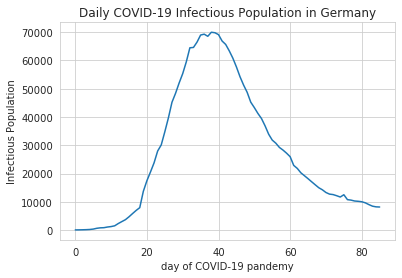

In [21]:
# Now to create a plot of the infectious population as a function of pandemy-day for Germany.
living = np.cumsum(cases) - np.cumsum(deaths)
living[14:] = living[14:] - living[:-14]
plt.xlabel('day of COVID-19 pandemy')
plt.ylabel('Infectious Population')
plt.title('Daily COVID-19 Infectious Population in Germany')
plt.plot(day, living)
plt.show()

# Discussion

Here we have plotted graph of infectious population as a function of pandemy-day for Germany. We can see that it is a bell shaped curve.
For a freely spreading pandemy the peak of such curve is much higher and the width of the bell shape of curve is very small. 
We can see that the right side of the curve is not the same as left side. It is because there is still a lot of uneffected population 
which can get infected if the limitation are removed again. 

And assuming that the government withdraws all CVID-19 restrictions today and people immediately start behaving as before the crisis then 
we can expect the curve to show almost the same increament as before. So, looking at the graph, we can say that it may take approximately
20 days to reach its all-time maximum.


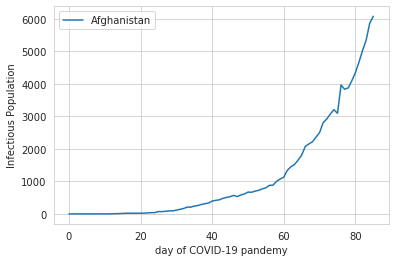

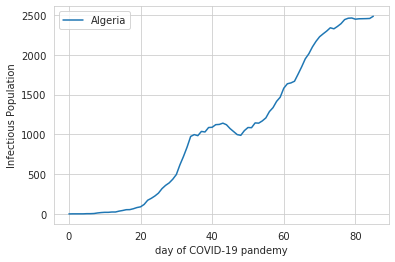

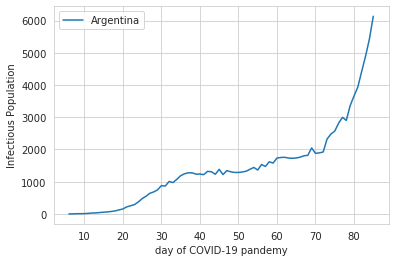

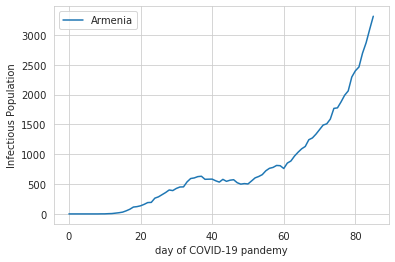

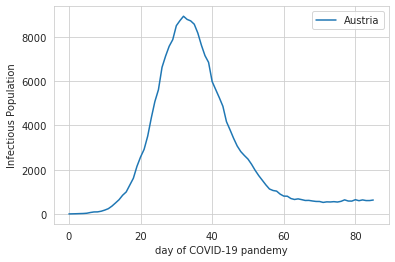

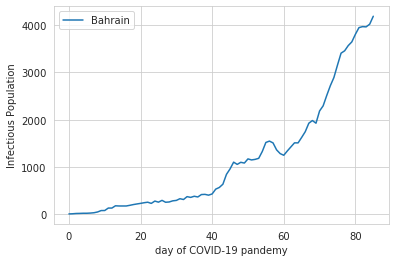

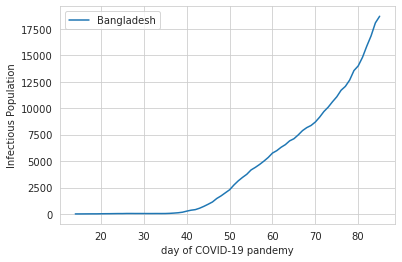

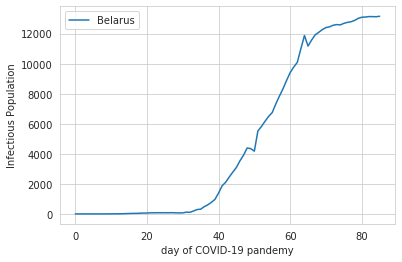

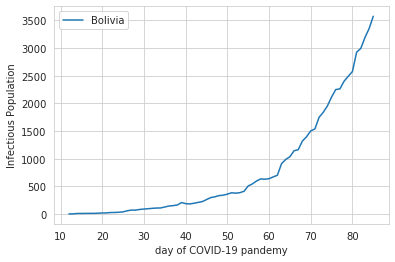

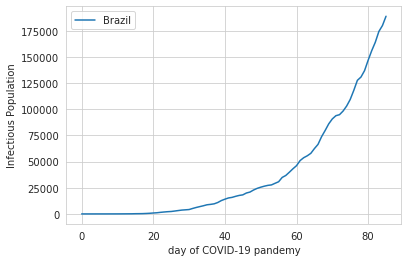

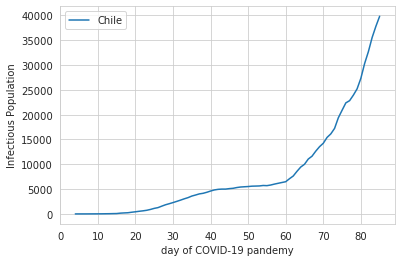

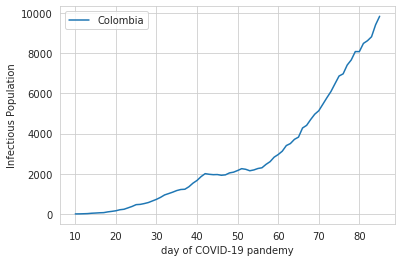

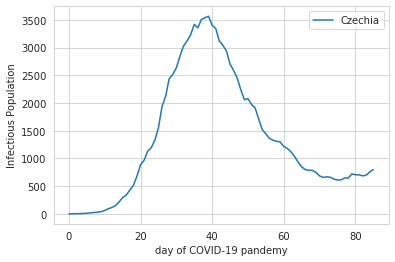

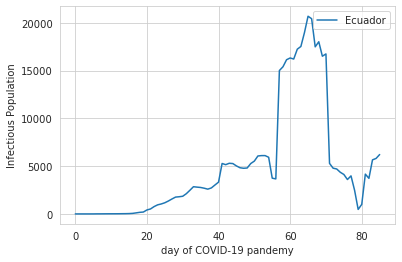

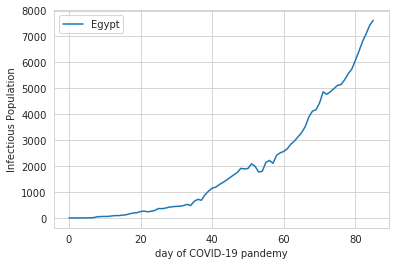

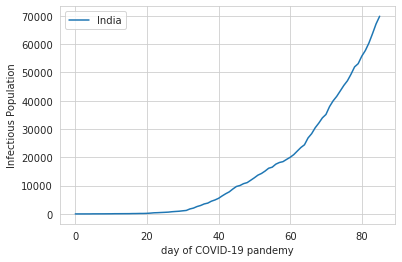

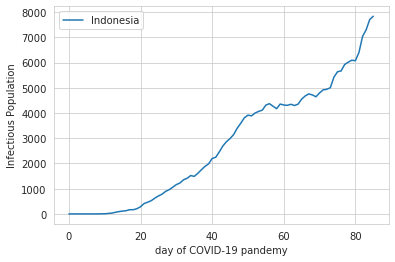

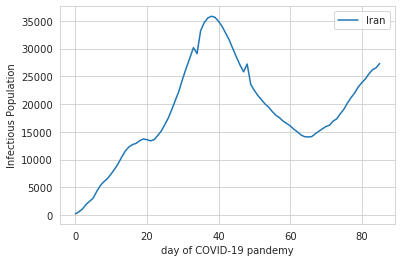

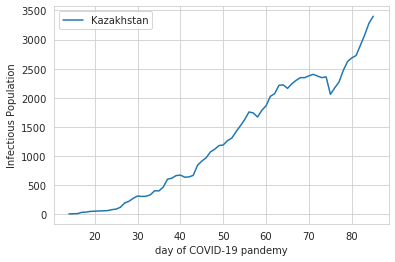

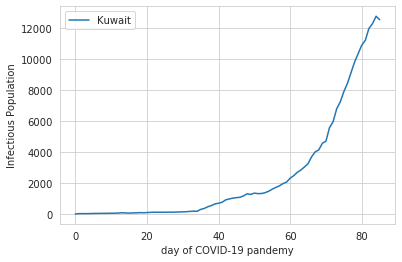

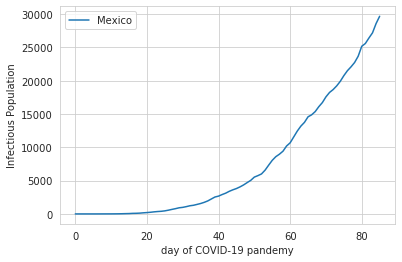

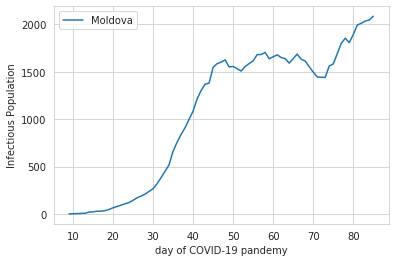

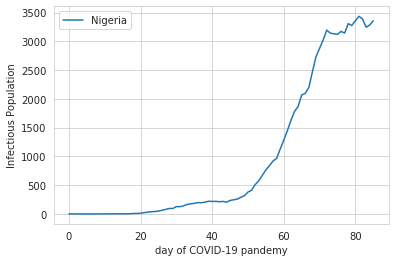

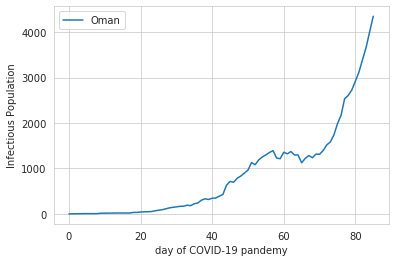

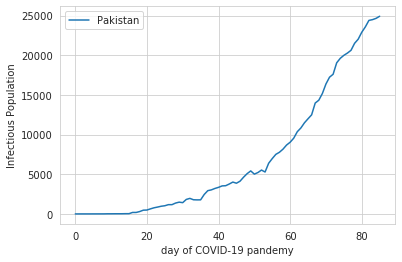

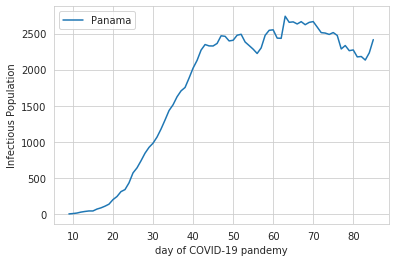

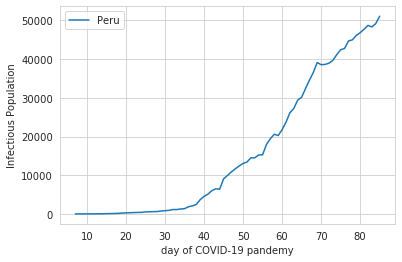

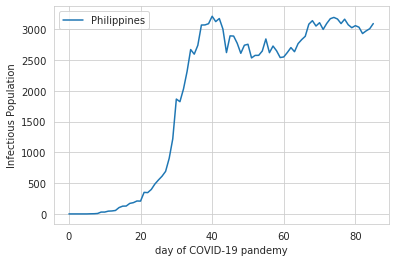

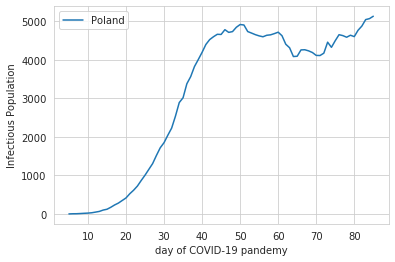

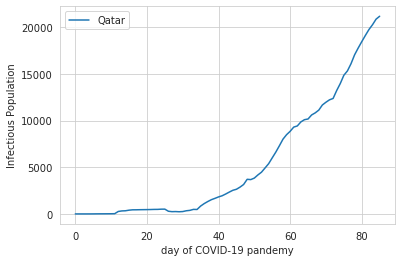

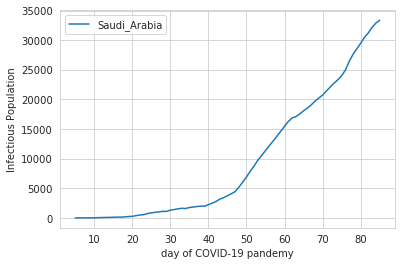

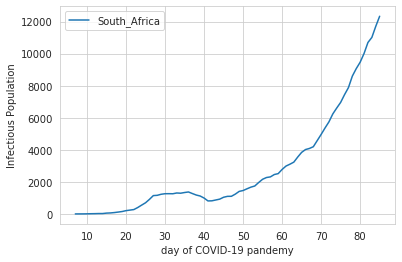

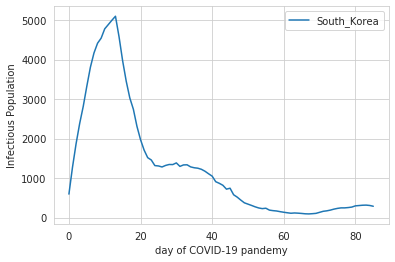

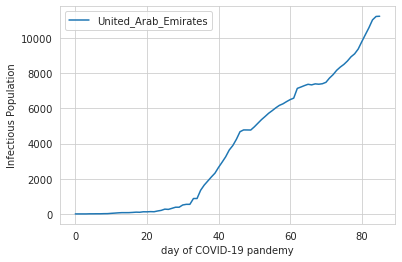

['Afghanistan', 'Algeria', 'Argentina', 'Armenia', 'Austria', 'Bahrain', 'Bangladesh', 'Belarus', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Czechia', 'Ecuador', 'Egypt', 'India', 'Indonesia', 'Iran', 'Kazakhstan', 'Kuwait', 'Mexico', 'Moldova', 'Nigeria', 'Oman', 'Pakistan', 'Panama', 'Peru', 'Philippines', 'Poland', 'Qatar', 'Saudi_Arabia', 'South_Africa', 'South_Korea', 'United_Arab_Emirates'] 34


In [23]:
# Now to loop over all the provided countries who currently still have a raising infectious population
# with more than 5000 confirmed COVID-19 cases.

i = 0
j = 0
list = [None] * len(countries)
for country in countries:

    country = countries[i]
    day, cases, deaths = corona[country]

    living = np.cumsum(cases) - np.cumsum(deaths)
    living[14:]=living[14:]-living[:-14]
    
    covid_progress = [None] * (len(living)-1)
    covid_progress = (living[1:]-living[:-1])/(day[1:]-day[:-1])
    
    # Converting float array into integer array.
    covid_progress = covid_progress.astype(int) 

    
    # Filtering out only rising cases in last 7 days.
    list1 = covid_progress[-7:]
    
    
    # Creating list and plotting graph of only those contries whose have more than 5000 cases over all 
    # and showed more increase in the infectious population in last 7 days than decrease.
    if(sum(cases) > 5000 and sum(list1)>0):
        list[j] = country
        
        plt.xlabel('day of COVID-19 pandemy')
        plt.ylabel('Infectious Population')
        plt.plot(day,living,label=country)
        plt.legend()
        plt.show()
        j = j+1
    i = i+1
print(list[:j], len(list[:j]))

# Discussion 

In this last part we have calculated the infectious population as a function of pandemy-day for all the countries and then only selected 
those countries which have overall more than 5000 cases of COVID-19 and are still showing increasing pattern in the graph. 

And, to check the increase or decrease is in infectious population we calculated the first derivates of these curves.
As we can see that these graphs some times show zigzag like patter so just checking last or last few derivatives was not enough to conclude 
that whether the graph was increasing or dreasing overall. So, I considered the change (derivative) in the graph in last 7 days and then 
considered only those countries whose sum of these 7 derivatives was greater than 0.
We considered the sum of these derivatives because there are some countries whose graphs have more positive derivatives in last 7 days 
but still have more decrease/increase in the number of infectious population than increase/decrease.
